In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans, OPTICS, Birch
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243844 entries, 0 to 243843
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              243844 non-null  object 
 1   spkid           243844 non-null  int64  
 2   full_name       243844 non-null  object 
 3   pdes            243844 non-null  int64  
 4   name            21219 non-null   object 
 5   prefix          0 non-null       float64
 6   neo             243844 non-null  object 
 7   pha             243844 non-null  object 
 8   H               243844 non-null  float64
 9   diameter        96707 non-null   float64
 10  albedo          96677 non-null   float64
 11  diameter_sigma  96590 non-null   float64
 12  orbit_id        243844 non-null  object 
 13  epoch           243844 non-null  float64
 14  epoch_mjd       243844 non-null  int64  
 15  epoch_cal       243844 non-null  float64
 16  equinox         243844 non-null  object 
 17  e         

In [4]:
data.head(10)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,Hebe,NaN,N,N,5.80,185.180,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,Iris,NaN,N,N,5.60,199.830,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,Flora,NaN,N,N,6.50,147.491,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,Metis,NaN,N,N,6.30,190.000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,Hygiea,NaN,N,N,5.50,407.120,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


In [5]:
data.isna().sum()


id                     0
spkid                  0
full_name              0
pdes                   0
name              222625
prefix            243844
neo                    0
pha                    0
H                      0
diameter          147137
albedo            147167
diameter_sigma    147254
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     1
n                      1
tp                     1
tp_cal                 1
per                    1
per_y                  1
moid                   1
moid_ld                1
sigma_e                2
sigma_a                2
sigma_q                2
sigma_i                2
sigma_om               2
sigma_w                2
sigma_ma               2
sigma_ad               2


In [7]:
data_selected = data.drop(["name", "prefix", "diameter", "albedo", "diameter_sigma"], axis=1)
data_selected = data_selected.dropna().reset_index().drop("index", axis=1)

data_selected.head(10)

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
5,a0000006,2000006,6 Hebe,6,N,N,5.80,JPL 89,2459000.5,59000,...,2.191800e-06,1.122100e-05,1.300600e-05,7.392200e-06,3.306700e-09,4.438800e-10,2.875400e-05,2.344500e-06,MBA,0.41032
6,a0000007,2000007,7 Iris,7,N,N,5.60,110,2459000.5,59000,...,2.582500e-06,2.641200e-05,2.707500e-05,7.014700e-06,2.469500e-09,3.370100e-10,2.662700e-05,1.699400e-06,MBA,0.38128
7,a0000008,2000008,8 Flora,8,N,N,6.50,JPL 118,2459000.5,59000,...,3.240300e-06,2.432000e-05,2.664600e-05,1.209200e-05,2.668100e-09,4.746200e-10,4.018700e-05,1.876500e-06,MBA,0.54186
8,a0000009,2000009,9 Metis,9,N,N,6.30,JPL 116,2459000.5,59000,...,2.007400e-06,2.417000e-05,2.600800e-05,1.036600e-05,3.470200e-09,5.192700e-10,3.870700e-05,2.614600e-06,MBA,0.44895
9,a0000010,2000010,10 Hygiea,10,N,N,5.50,JPL 96,2459000.5,59000,...,2.173400e-06,2.855200e-05,3.023700e-05,1.124600e-05,7.699800e-09,5.847400e-10,6.482900e-05,6.724400e-06,MBA,0.53434


In [8]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243842 entries, 0 to 243841
Data columns (total 40 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         243842 non-null  object 
 1   spkid      243842 non-null  int64  
 2   full_name  243842 non-null  object 
 3   pdes       243842 non-null  int64  
 4   neo        243842 non-null  object 
 5   pha        243842 non-null  object 
 6   H          243842 non-null  float64
 7   orbit_id   243842 non-null  object 
 8   epoch      243842 non-null  float64
 9   epoch_mjd  243842 non-null  int64  
 10  epoch_cal  243842 non-null  float64
 11  equinox    243842 non-null  object 
 12  e          243842 non-null  float64
 13  a          243842 non-null  float64
 14  q          243842 non-null  float64
 15  i          243842 non-null  float64
 16  om         243842 non-null  float64
 17  w          243842 non-null  float64
 18  ma         243842 non-null  float64
 19  ad         243842 non-n

In [10]:
df_descr = data_selected.describe()
numeric_cols = df_descr.drop("spkid", axis=1).columns

df_descr

,spkid,pdes,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,2.438420e+05,243842.000000,243842.000000,2.438420e+05,243842.000000,2.438420e+05,243842.000000,243842.000000,243842.000000,243842.000000,...,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,2.438420e+05,243842.000000
mean,2.121922e+06,121921.949074,15.418530,2.459000e+06,58999.700056,2.020052e+07,0.140563,2.705861,2.320278,7.713907,...,6.566645e-06,5.961619e-06,7.736936e-05,2.415551e-04,1.792701e-04,5.085849e-05,3.520084e-09,3.889074e-02,2.439822e-01,0.553046
std,7.039170e+04,70391.695029,1.235568,3.449651e+01,34.496506,9.495962e+02,0.070192,2.167566,1.055467,5.676464,...,5.180591e-04,1.858852e-05,5.444143e-04,3.816081e-02,3.690664e-02,1.060887e-02,6.133168e-08,1.074337e+01,6.539291e+01,0.049625
min,2.000001e+06,1.000000,-1.100000,2.452464e+06,52464.000000,2.002071e+07,0.000979,0.617500,0.092025,0.022056,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.078624
25%,2.060961e+06,60961.250000,14.800000,2.459000e+06,59000.000000,2.020053e+07,0.089603,2.373733,1.998284,3.446373,...,1.020700e-07,4.498600e-06,2.652025e-05,3.791700e-05,1.591200e-05,1.324400e-08,1.748900e-09,6.561300e-05,9.810950e-06,0.523610
50%,2.121922e+06,121921.500000,15.500000,2.459000e+06,59000.000000,2.020053e+07,0.135847,2.609005,2.213794,6.197962,...,1.262600e-07,5.294300e-06,4.387250e-05,5.678600e-05,2.252800e-05,1.836400e-08,2.146700e-09,9.771950e-05,1.424500e-05,0.554510
75%,2.182883e+06,182882.750000,16.200000,2.459000e+06,59000.000000,2.020053e+07,0.183724,2.910245,2.565905,10.741733,...,1.582275e-07,6.352300e-06,8.197650e-05,9.508100e-05,3.458675e-05,2.588300e-08,2.643900e-09,1.571700e-04,2.125100e-05,0.584600
max,2.243843e+06,243843.000000,24.200000,2.459000e+06,59000.000000,2.020053e+07,0.963287,564.699310,76.256711,160.430921,...,1.845500e-01,3.225800e-03,2.016800e-01,1.860100e+01,1.800800e+01,4.652000e+00,9.166700e-06,5.253500e+03,3.085000e+04,0.929050


In [11]:
numeric_cols


Index(['pdes', 'H', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i',
       'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid',
       'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om',
       'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per',
       'rms'],
      dtype='object')

In [12]:
Normal_distrib = ['H', 'e', 'tp', 'tp_cal']
Uniform_distrib = ['om', 'w', 'ma']
Semi_log_distrib = ['epoch', 'epoch_mjd', 'epoch_cal']
Lognormal_distrib = ['a', 'q', 'i', 'ad', 'n', 'per', 'per_y',
                     'moid', 'moid_ld', 'sigma_e', 'sigma_a',
                     'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
                     'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp',
                     'sigma_per', 'rms']

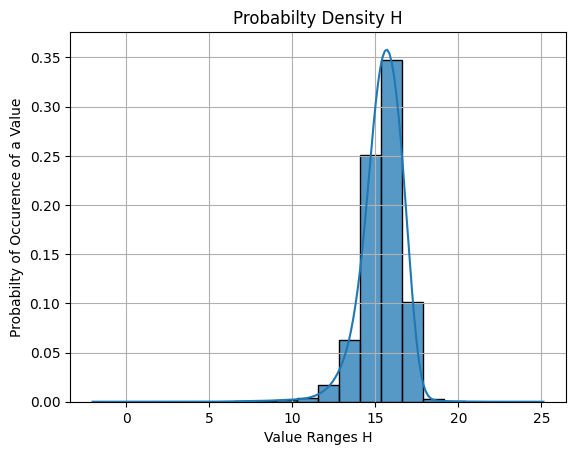

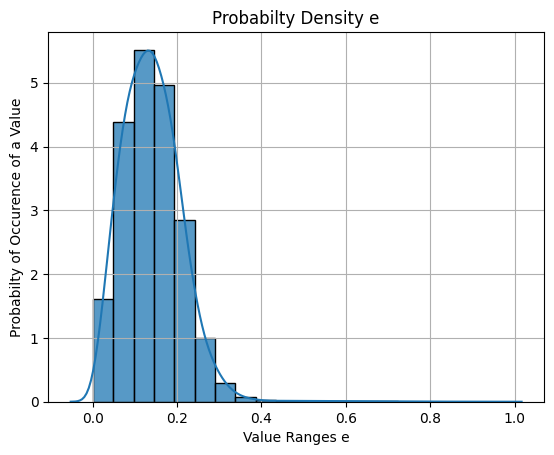

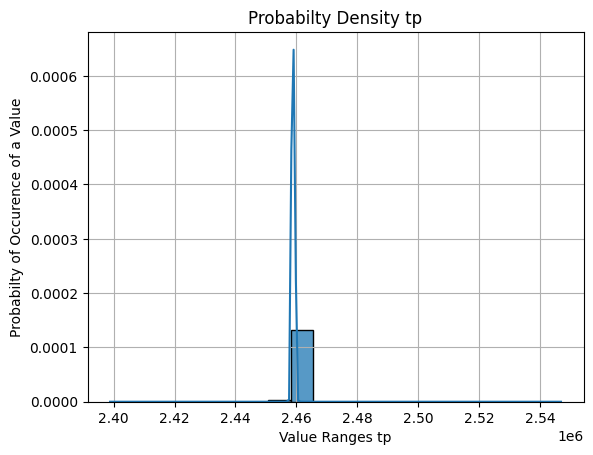

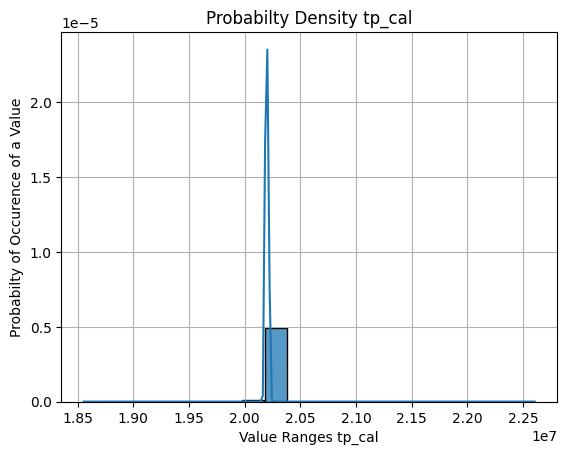

In [13]:
for colname in Normal_distrib:
    plt.title(f"Probabilty Density {colname}")
    sns.histplot(data=data_selected, x=colname, bins=20, stat="density")
    sns.kdeplot(data=data_selected, x=colname, bw_adjust=3)
    plt.xlabel(f"Value Ranges {colname}")
    plt.ylabel("Probabilty of Occurence of a Value")
    plt.grid()
    plt.show()

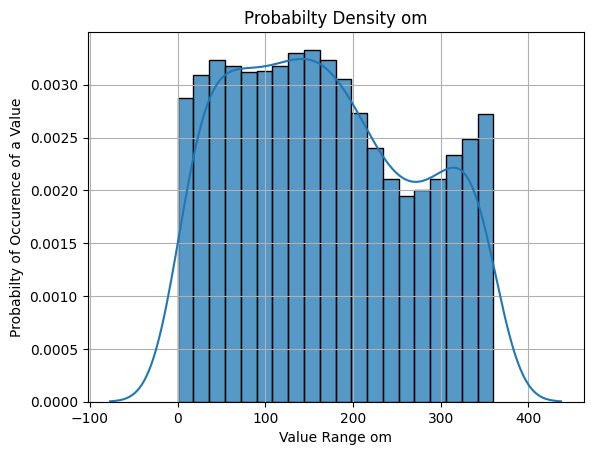

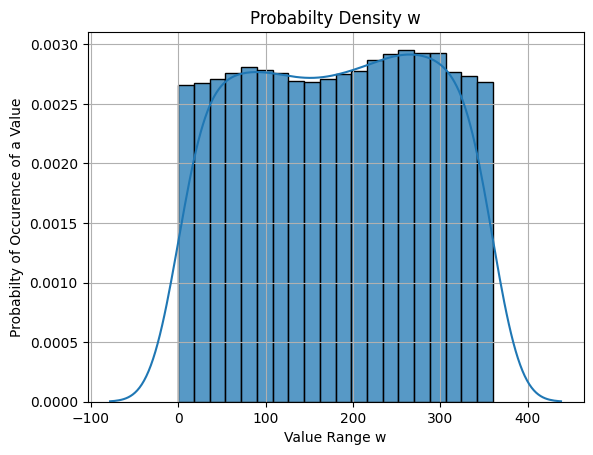

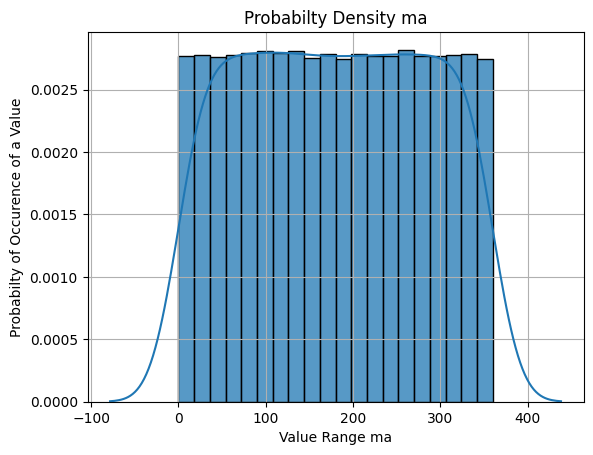

In [14]:
for colname in Uniform_distrib:
    plt.title(f"Probabilty Density {colname}")
    sns.histplot(data=data_selected, x=colname, bins=20, stat="density")
    sns.kdeplot(data=data_selected, x=colname, bw_adjust=3)
    plt.xlabel(f"Value Range {colname}")
    plt.ylabel("Probabilty of Occurence of a Value")
    plt.grid()
    plt.show()

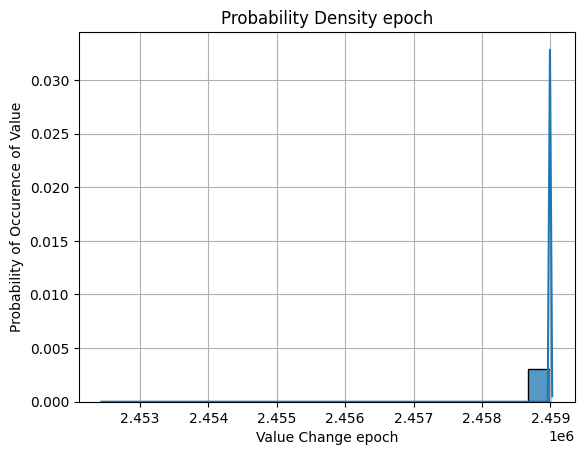

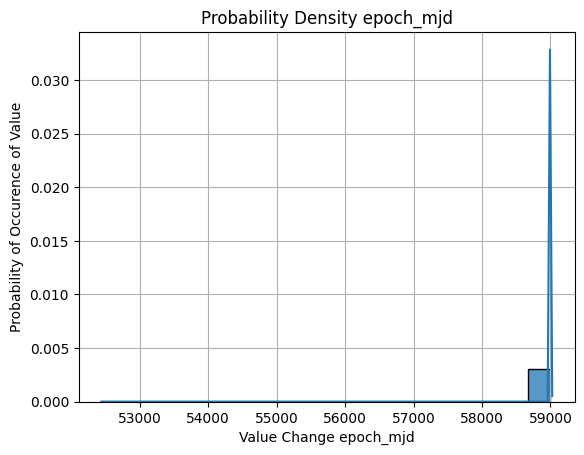

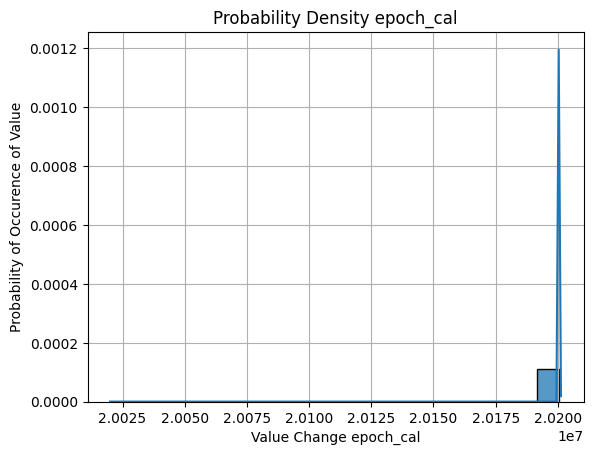

In [15]:
data_semilog = data_selected[Semi_log_distrib]

for colname in Semi_log_distrib:
    plt.title(f"Probability Density {colname}")
    sns.histplot(data=data_semilog, x=colname, bins=20, stat="density")
    sns.kdeplot(data=data_semilog, x=colname, bw_adjust=3)
    plt.xlabel(f"Value Change {colname}")
    plt.ylabel("Probability of Occurence of Value")
    plt.grid()
    plt.show()


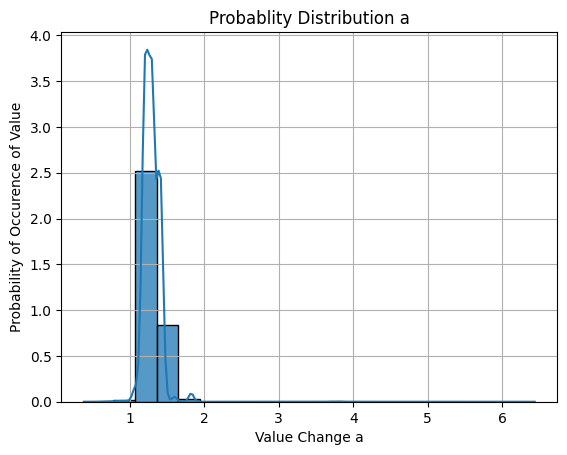

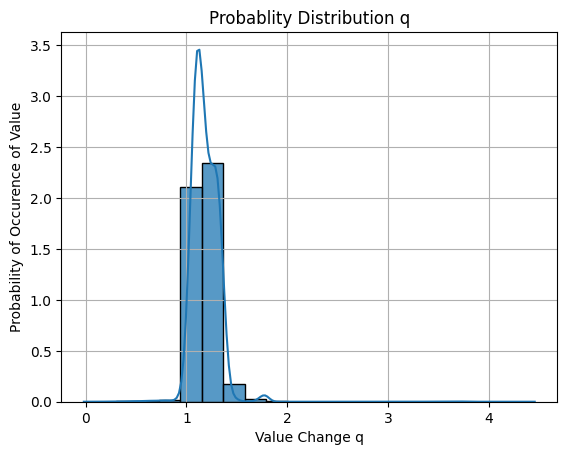

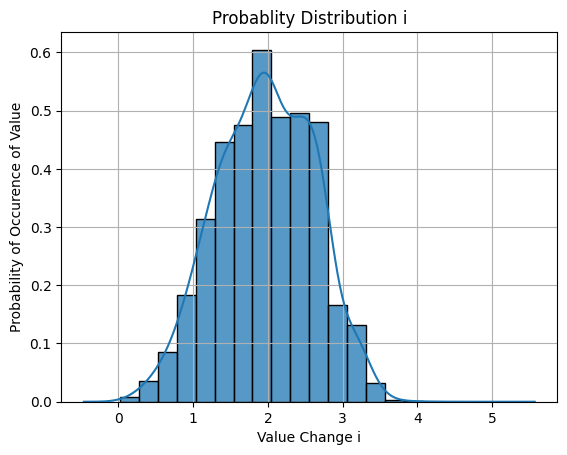

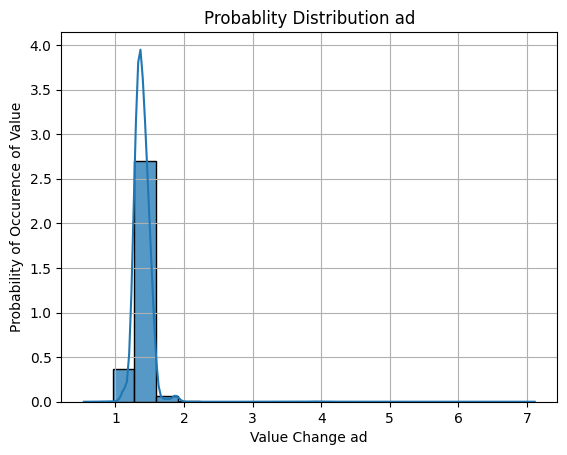

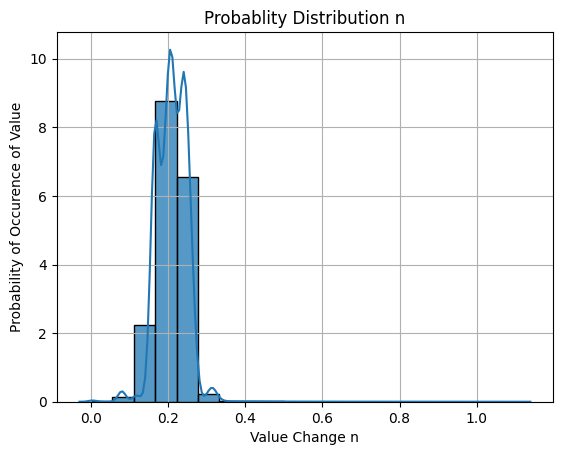

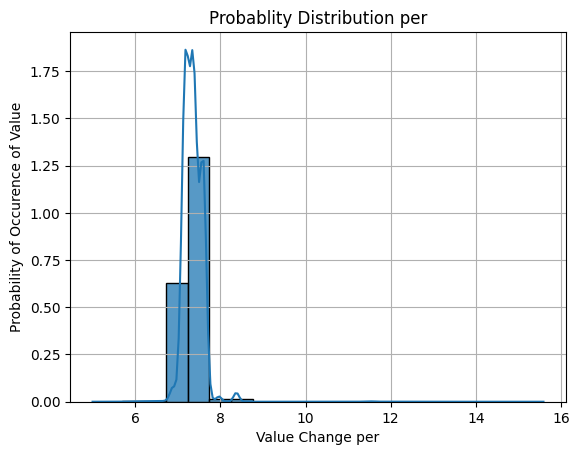

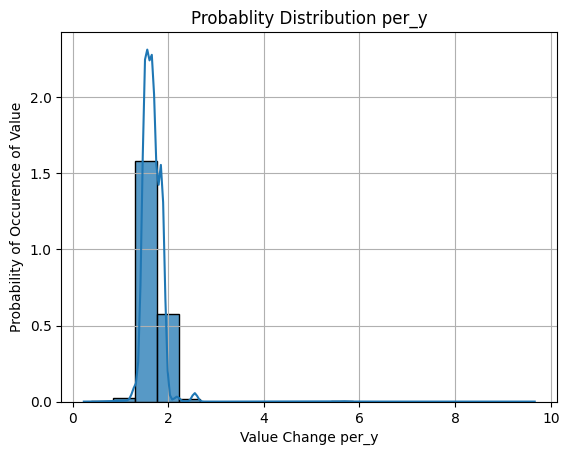

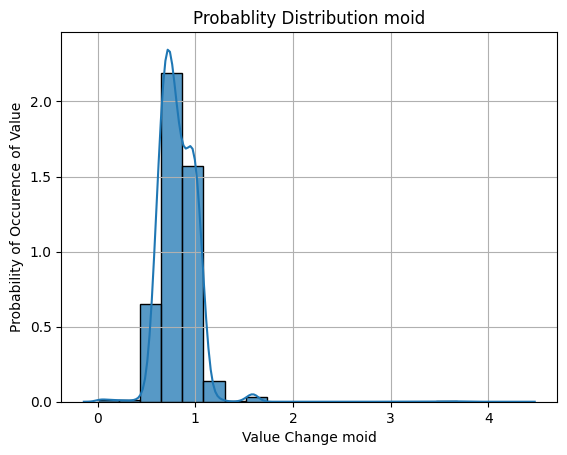

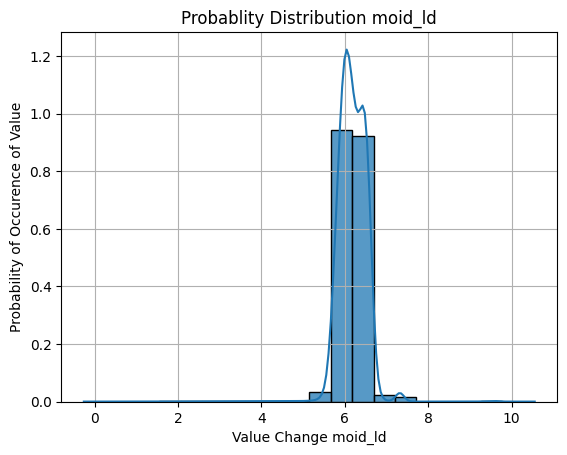

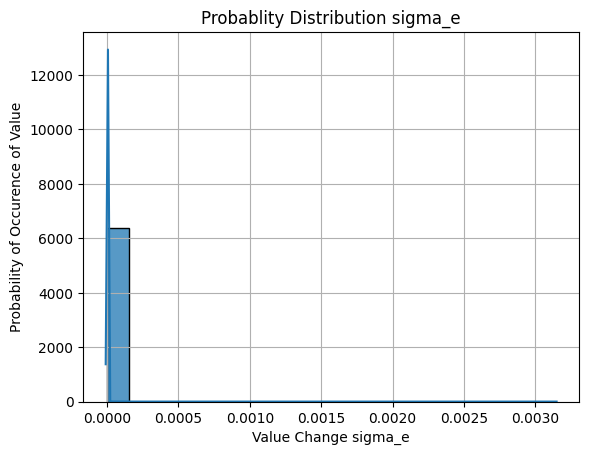

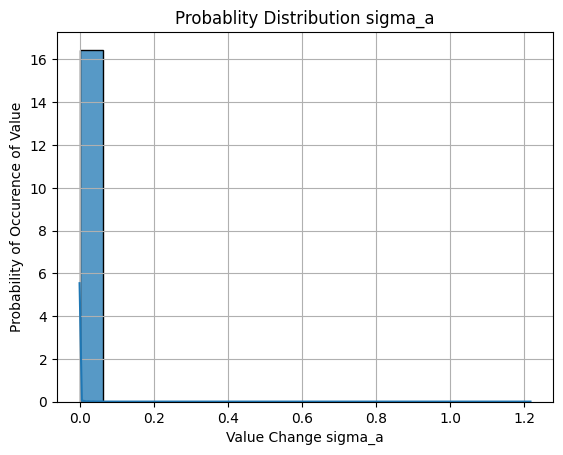

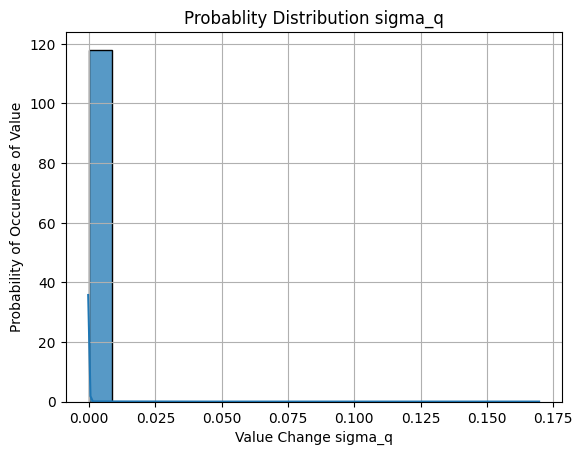

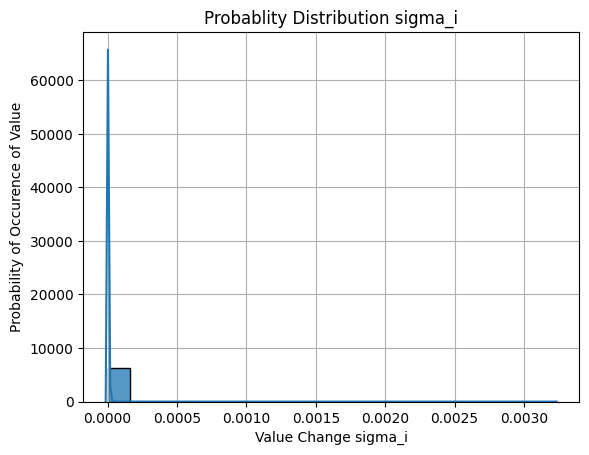

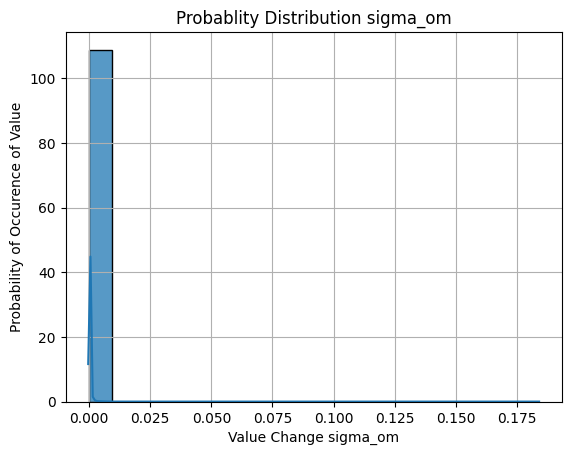

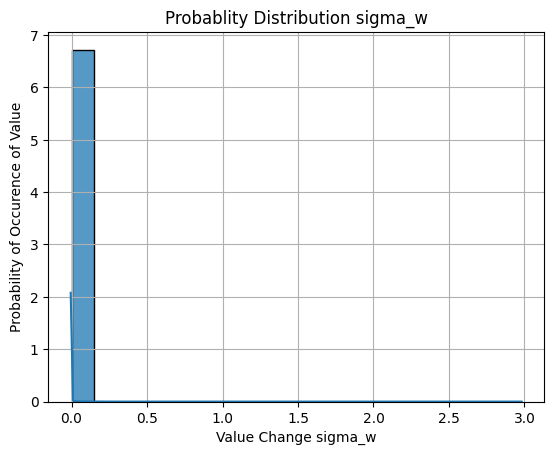

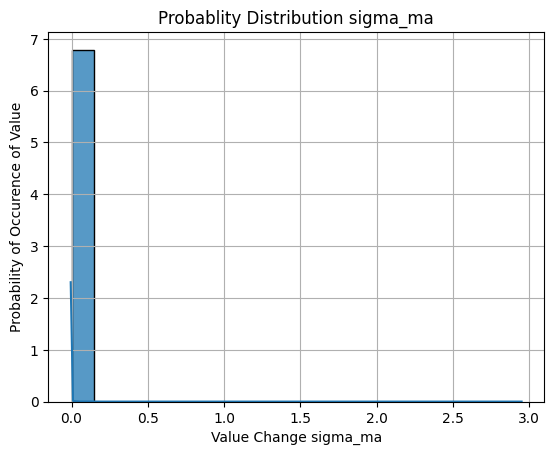

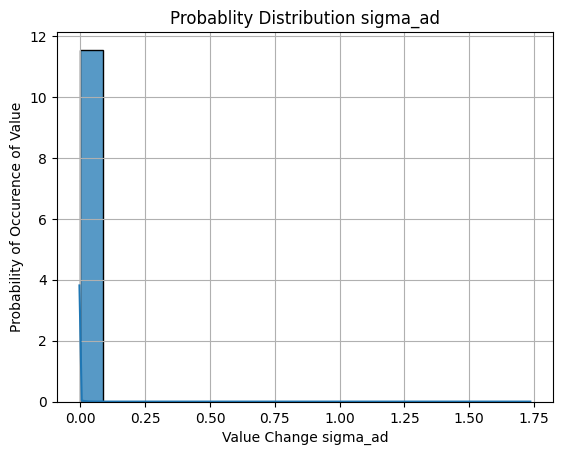

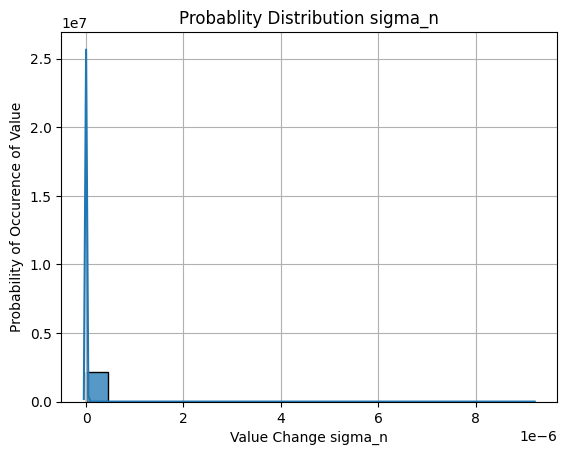

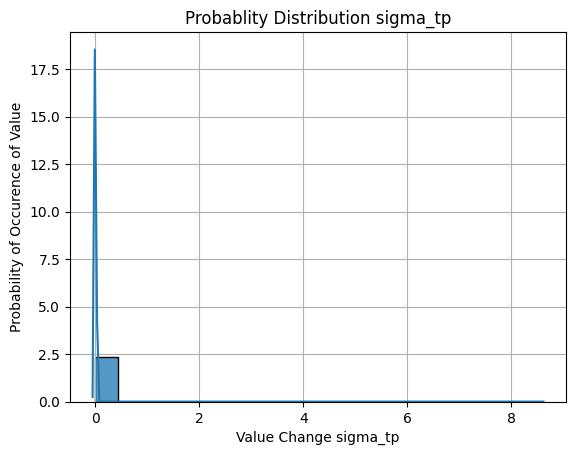

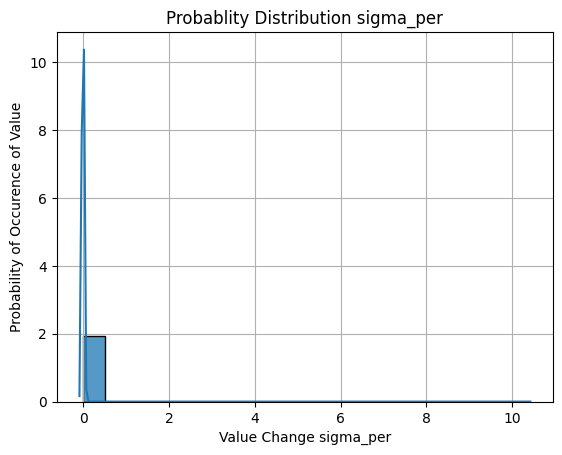

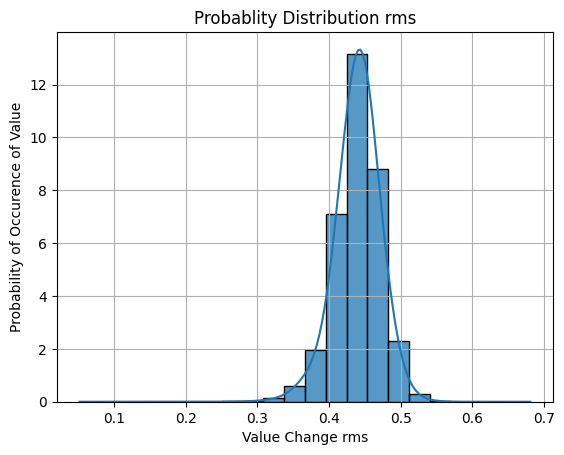

In [16]:
data_lognormal = data_selected[Lognormal_distrib].apply(lambda x : np.log(x+1))

for colname in Lognormal_distrib:
  plt.title(f"Probablity Distribution {colname}")
  sns.histplot(data=data_lognormal, x=colname, bins=20, stat="density")
  sns.kdeplot(data=data_lognormal, x=colname, bw_adjust=3)
  plt.xlabel(f"Value Change {colname}")
  plt.ylabel("Probability of Occurence of Value")
  plt.grid()
  plt.show()


In [18]:
data_selected[Lognormal_distrib] = data_selected[Lognormal_distrib].apply(lambda x: np.log(x+1))


In [32]:
clustering_model = MiniBatchKMeans(n_clusters=10, batch_size=4000)
preds = clustering_model.fit_predict(data_selected[numeric_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
clustering_model.cluster_centers_

array([[3.45106730e+04, 1.44748831e+01, 2.45899750e+06, 5.89970016e+04,
        2.02004480e+07, 1.35198286e-01, 1.30108579e+00, 1.19645484e+00,
        1.97601814e+00, 1.68812437e+02, 1.82690725e+02, 1.29642271e+02,
        1.39331585e+00, 2.08789471e-01, 2.45855345e+06, 2.01870902e+07,
        7.37038977e+00, 1.68068422e+00, 8.35888640e-01, 6.20826958e+00,
        1.49076108e-07, 7.05876615e-06, 2.03975592e-06, 4.86350714e-06,
        6.25975029e-05, 1.12975879e-04, 7.29446565e-05, 8.31279621e-06,
        3.03635925e-09, 1.91500872e-03, 4.59212925e-03, 4.19402143e-01],
       [2.20001251e+05, 1.62469024e+01, 2.45900022e+06, 5.89997165e+04,
        2.02005235e+07, 1.42068143e-01, 1.29882984e+00, 1.18872596e+00,
        1.94030092e+00, 1.65077258e+02, 1.79615516e+02, 1.80239278e+02,
        1.39563530e+00, 2.07999518e-01, 2.45900615e+06, 2.01999157e+07,
        7.36777051e+00, 1.67727011e+00, 8.26209293e-01, 6.19479140e+00,
        6.17709142e-08, 2.50489990e-08, 1.68701450e-07, 6.62438

In [34]:
clustering_model.inertia_

109650375405587.47

In [35]:
clustering_model.max_no_improvement

10

In [36]:
ssd = []
for num_clusters in list(range(1,20)):
    model_clus = MiniBatchKMeans(n_clusters = num_clusters, max_iter=50, batch_size=4000, n_init=3)
    model_clus.fit(data_selected[numeric_cols])
    ssd.append(model_clus.inertia_)

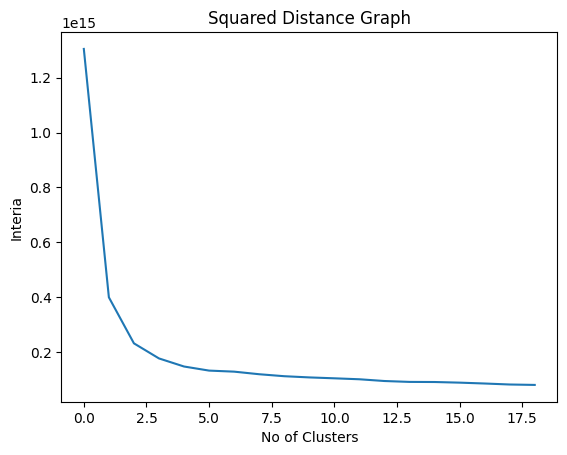

In [37]:
plt.title("Squared Distance Graph")
plt.plot(ssd)
plt.ylabel("Interia")
plt.xlabel("No of Clusters")
plt.show()

In [38]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
transformed2d = pca_model.fit_transform(data_selected[numeric_cols])

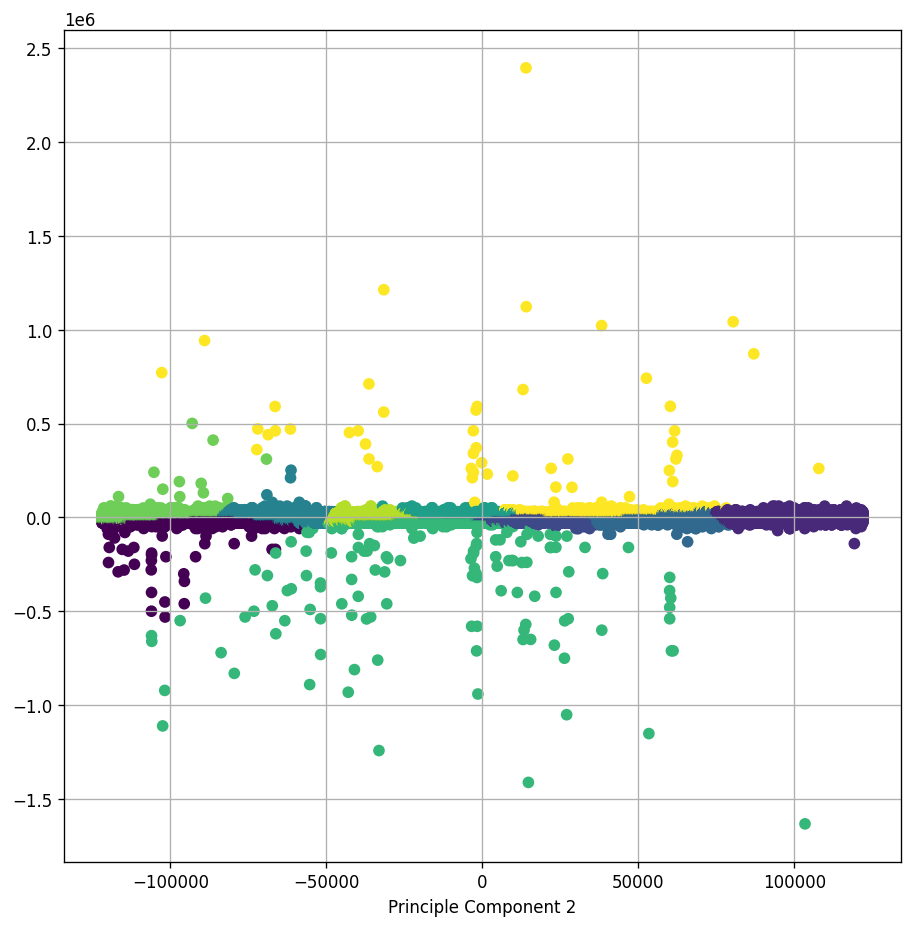

In [39]:
plt.figure(figsize=(9, 9), dpi=120)
plt.scatter(transformed2d[:, 0], transformed2d[:, 1], c = preds)
plt.xlabel(f"Principle Component 1")
plt.xlabel(f"Principle Component 2")
plt.grid()
plt.show()
